# Assignment 1 (shortened)

This notebook contains three exercises from the exercise sets we covered prior to moving the teaching online. It will count as one of the two assignments you need to submit to qualify for the exam. **The deadline** for handing in this assignment is **April 3.** You hand in by pushing your solutions to your folder in the exercise repo.

## Problems from exercise set 2
> **Ex. 2.1.1**: The performance of a random forest classifier is highly sensitive to hyper parameters. Therefore, you should be intimately familiar with what the most important ones do. For each point below, explain what the hyper parameter pertaining to `sklearn.ensemble.RandomForestClassifier` controls, and how setting it either too low or too high (or True/False) might hurt model performance:
1. `n_estimators`
2. `max_depth`
3. `max_features`
4. `bootstrap`

**Solution**

n_estimators is the number of trees in the forest. Increasing the number of trees decreases the variation of the overall model, but there are dimishing returns from increasing the number of trees. Therefore, it comes at a computational cost. The objective of tuning this parameter should therefore be to find the number of trees where performance begins to plateau. 

max_depth is the max number of levels in each decisiontree. More levels leads to more complex decision boundaries which can lead to overfitting. Therefore, it is important to tune max_depth to improve performance by balancing between under-/overfitting. 

max_features is the max number of features considered for splitting a node. considering more features before splitting increases the chance of finding a better split. However, it increases the correlation among the trees and therefore increases the variation of the overall model. 


bootstrap is the method for sampling data points

> **Ex. 2.1.2**: For `n_estimators > 1`how should one set the hyper-parameters `max_features` and `bootstrap` so that all the trees in the ensemble end up identical?

**Solution**

To create one random decision tree a random subset of the training sample is drawn if bootstrap = True, which is default. If bootstrap = False the whole dataset is used to construct each decision tree. Thus, to create identical trees in the ensemble bootstrap=false is required to eliminate the randomness. For each subset of the training sample a subset of features are drawn determined by max_features. Therefore setting max_features = None would imply max_features = n_features i.e. the total number of features in the dataset. This should yield identical trees in the ensemble. 

## Problems from exercise set 3

> **Ex. 3.1.2**: Reproduce the figure from the slides that compares PCA, LDA, t-SNE and UMAP as applied to the digits dataset.
1. Do it for the digits dataset (same as in slides)
2. Do it also for the wine dataset. What problems do you observe if you don't standardize the wine dataset? Why is this not a problem with the digits data?
3. Comment on the differences you observe as well as the applicability (and necessity thereof) of different methods for different data.
>
> *Hint: You can use [this class](https://github.com/ulfaslak/ulf_pytools/blob/7f4f1eb7e2d721851c8dacb20904478b19090f2a/ulf.py#L451) for making coloring easier. It lets you create a function that takes a category as input and returns an associated color. Read the docstring for usage example.*

In [28]:
# Solution
import pandas as pd
from sklearn.datasets import load_wine
from sklearn.datasets import load_digits
from umap import UMAP
from sklearn.manifold import TSNE
from sklearn.decomposition import PCA
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

# Get wine data
data_wine = load_wine()
X_wine = data_wine['data']
y_wine = data_wine['target']

# Get digits data
data_digits = load_digits()
X_digits = data_digits['data']
y_digits = data_digits['target']

In [17]:
def cluster(X,y,pca=True,lda=True,tsne=True,umap=True,scale=False):
    """
    parameters: 
    X (array): Features
    y (array): Target
    scale (bool): If scale = true standardize the dataset
    
    Returns:
    PCA, LDA, TSNE and UMAP plots.
    
    """
    
    if scale == True:
        sc = StandardScaler()
        X = sc.fit_transform(X)
    if pca == True:
        X_PCA = PCA(n_components=2).fit_transform(X)
        fig = plt.figure(figsize=(20,20))
        plt.subplot(2,2,1)
        plt.scatter(X_PCA[:,0], X_PCA[:,1], c=y, cmap='viridis')
        plt.title("Principal Component Analysis", fontsize=16)
        plt.xlabel("1st component", fontsize=16)
        plt.ylabel("2nd component",fontsize=16)
    if lda == True:
        X_LDA = LDA(n_components=2).fit_transform(X,y)
        plt.subplot(2,2,2)
        plt.scatter(X_LDA[:,0], X_LDA[:,1], c=y, cmap='viridis')
        plt.title("Linear Discriminant Analysis", fontsize=16)
        plt.xlabel("1st component", fontsize=16)
        plt.ylabel("2nd component",fontsize=16)
    if tsne == True:
        X_TSNE = TSNE(n_components=2).fit_transform(X)
        plt.subplot(2,2,3)
        plt.scatter(X_TSNE[:,0], X_TSNE[:,1], c=y, cmap='viridis')
        plt.title("t-Distributed Stochastic Neighbor Embedding", fontsize=16)
        plt.xlabel("1st component", fontsize=16)
        plt.ylabel("2nd component",fontsize=16)
    if umap == True:
        X_UMAP = UMAP(n_components=2).fit_transform(X)
        plt.subplot(2,2,4)
        plt.scatter(X_UMAP[:,0], X_UMAP[:,1], c=y, cmap='viridis')
        plt.title("Uniform Manifold Approximation and Projections", fontsize=16)
        plt.xlabel("1st component", fontsize=16)
        plt.ylabel("2nd component",fontsize=16)
    plt.show()

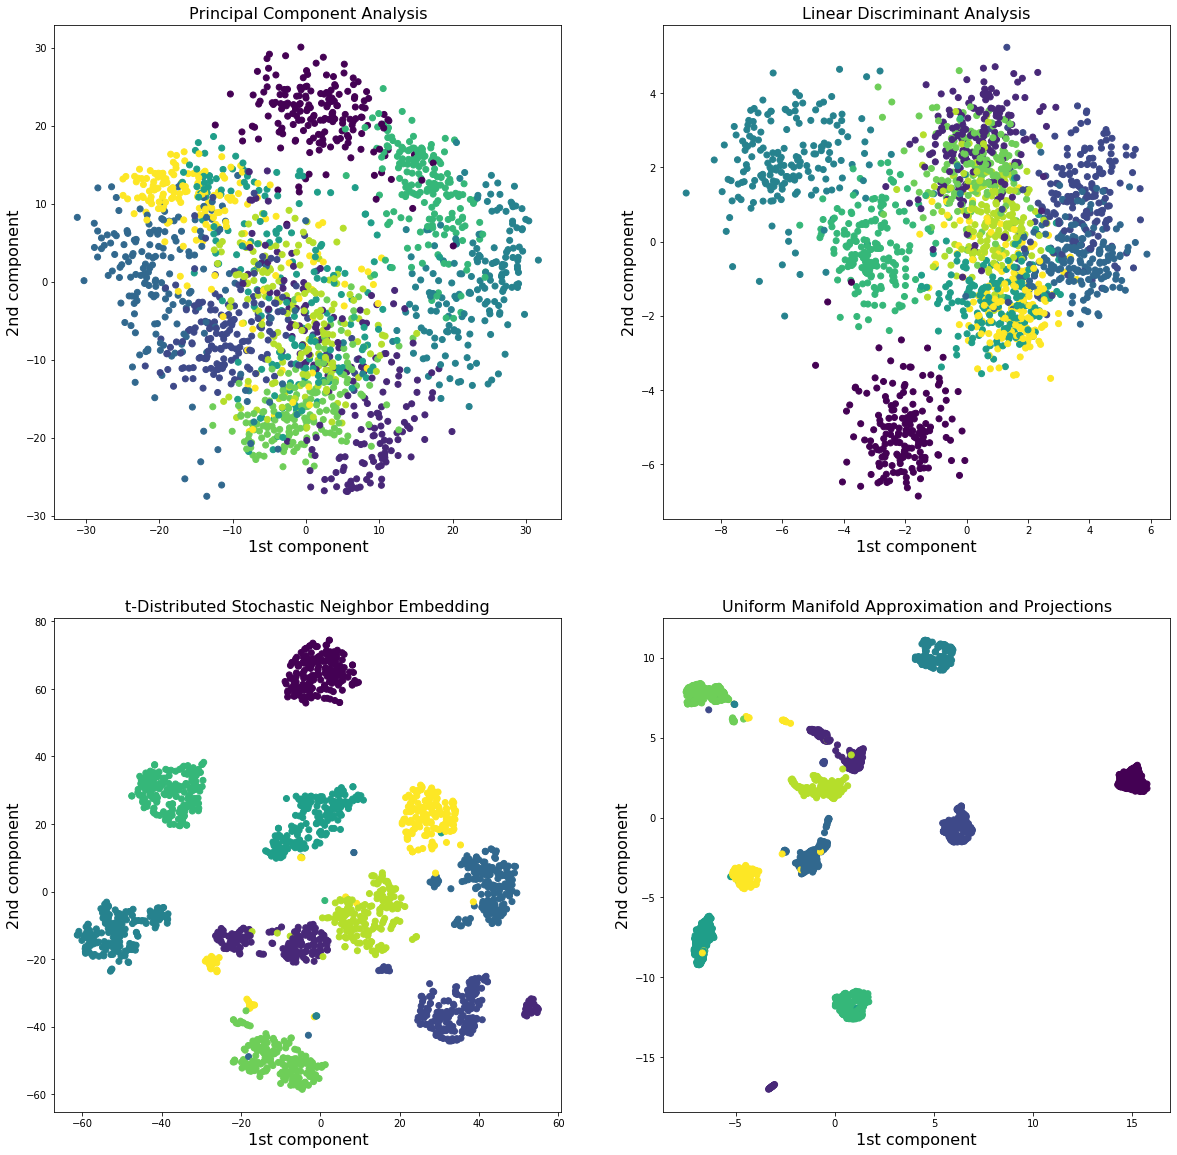

In [18]:
# Digits dataset
cluster(X_digits,y_digits)

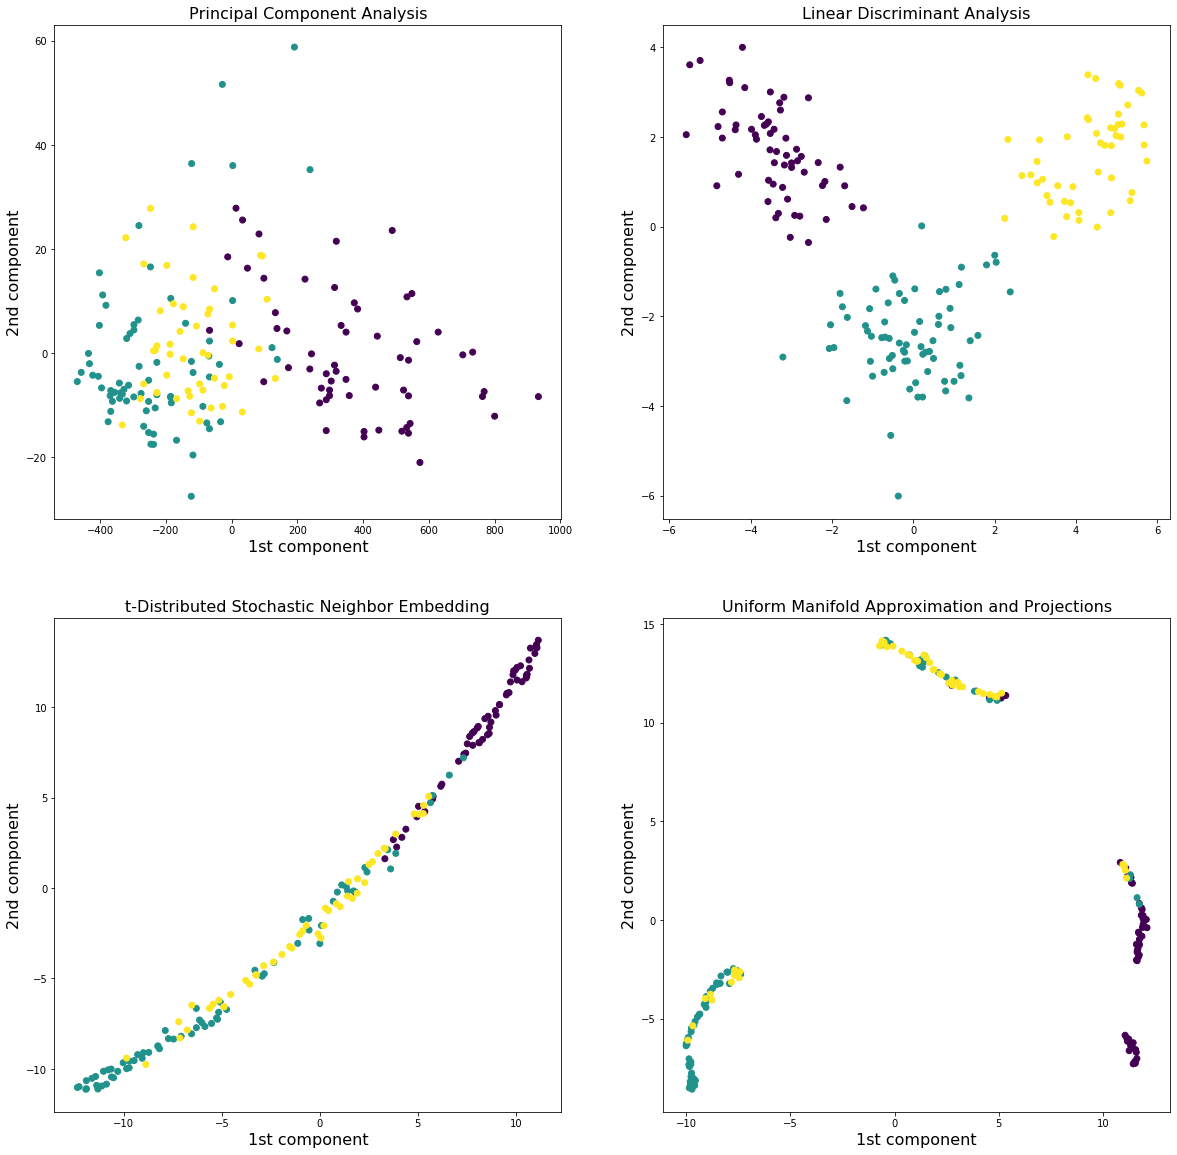

In [22]:
# Wine dataset (not standardized)
cluster(X_wine,y_wine,scale=False)

2. Do it also for the wine dataset. What problems do you observe if you don't standardize the wine dataset? Why is this not a problem with the digits data?

**Answer**

The wine dataset contains features with different order of magnitudes and therefore PCA will not assign equal importance to all features. In contrast, the digits dataset is already standardized. 
In the PCA plot the data is much more spread along the 1st component than the 2nd principal component which is caused by the first principal component explaining almost all of the variance. This can be confirmed if you choose not to standardize the data in EX 3.1.1. Furthermore, all cluster methods except LDA fails to divide the wines into their own seperate clusters. The reason why LDA performs well is that the algorithm tries to find a feature subspace that maximizes class separability instead of maximal variance as in PCA. 

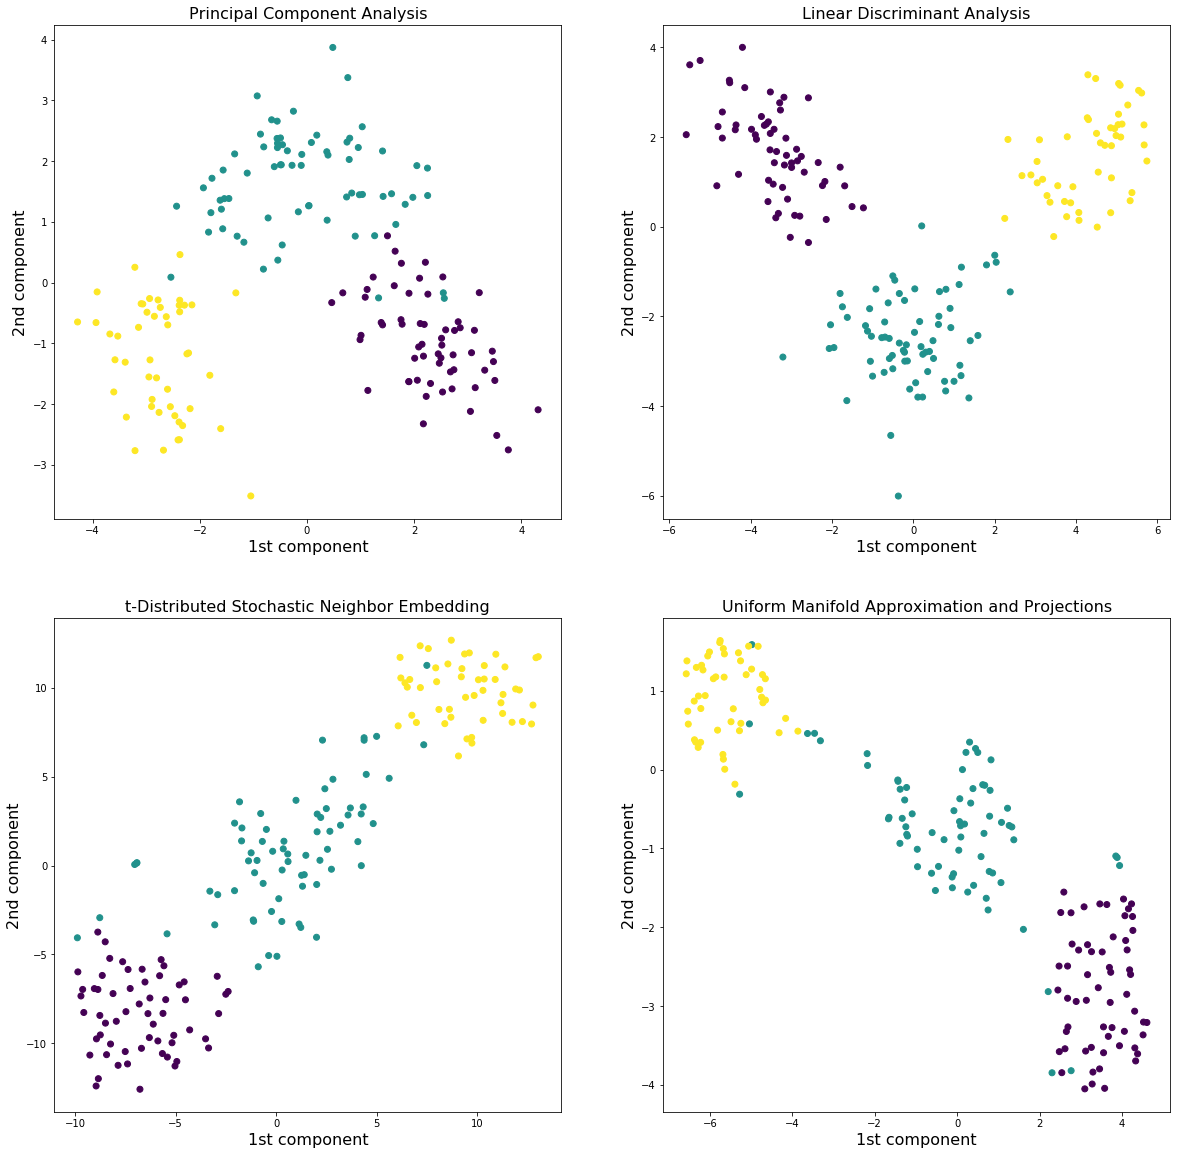

In [20]:
# Wine dataset (standardized)
cluster(X_wine,y_wine,scale=True)

3. Comment on the differences you observe as well as the applicability (and necessity thereof) of different methods for different data.

**Answer**

The difference in structure between the digits- and wine datasets impacts how the linear- and non-linear cluster methods performs. The digits dataset is highly non-linear in structure and therefore the two linear cluster methods, PCA and LDA, is not very useful. Instead the two non-linear methods, t-SNE and UMAP, performs very well because they are able to capture the highly complex data structures. However, these methods are not reversible and therefore not of much use other than visualization. Therefore, if PCA performs well - as we see in the standardized wine dataset - this is preferred over other cluster methods. 

## Problems from exercise set 4

In this problem we will try to implement and understand some of the ideas used in [Athey, Imbens (2015)](https://www.pnas.org/content/pnas/113/27/7353.full.pdf) to develop _Honest Inference_ in desicion tree models. The paper begins by covering honesty in a setting of population averages, and for estimating conditional means; so you will need to look towards the second half of the paper to get an impression of it's use for treatment-effect estimation.

> **Ex. 4.2.1:** What does it mean that a tree is _honest?_ In particular what are the implications in terms of 
> * The intuition for why honesty is required in order to get good local treatment effect estimates?
> * The practical implementation of the DT algorithm?

**Answer** 

A honest tree uses different subsamples for training and estimation. This ensures that there is no spurious correlations between covariates which implies a bias and therefore non-valid confidence intervals. With honest trees it is possible to construct valid confidence intervals for local treatment effects. 